In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,562 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dire

# Quiz 풀이

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

### Quiz 1

In [2]:
# Quiz 1
df = pd.read_csv('/content/gts-seoul.csv')
data1 = df.loc[(df['일시']=="2011-03-21 06:00"),["습도","풍속","현지기압","기온","이슬점 온도"]]
print(data1)
print(data1.sum(axis=1))

        습도   풍속    현지기압    기온  이슬점 온도
2101  21.9  8.0  1004.8  12.7    -8.5
2101    1038.9
dtype: float64


### Quiz 2

In [3]:
# Quiz 2
data2 = df.loc[:,["습도","풍속","현지기압","기온","이슬점 온도"]]
df2 = data2.dropna()
print(df2) # for check
print(len(df2)+df2["습도"].mean()+max(df2["풍속"])+min(df2["기온"]))

         습도    풍속   현지기압    기온  이슬점 온도
0      70.7   3.0  995.0  25.0    19.3
1      61.8   3.0  993.9  27.9    19.9
2      49.7   3.0  992.3  30.5    18.8
3      66.8   6.0  992.1  28.8    22.0
4      79.6   4.0  993.4  26.3    22.5
...     ...   ...    ...   ...     ...
32080  65.7  11.0  987.0  21.7    15.0
32081  83.8   5.0  989.7  18.9    16.1
32082  84.9   7.0  991.2  18.8    16.2
32083  85.9   4.0  991.7  18.4    16.0
32084  88.7   6.0  992.7  18.3    16.4

[32068 rows x 5 columns]
32128.421619683173


### Quiz 3

Quiz 3-1, 3-2

In [4]:
# Quiz 3
# 전처리 문제가 나오면 -> 전처리한 데이터를 쓰자!
## Quiz 3-1
data3 = df2.loc[:,["습도","풍속","현지기압","기온","이슬점 온도"]]
data3_pearson = data3.corr(method='pearson')
print(data3_pearson)
data3_dpt = data3_pearson[["이슬점 온도"]]
print(data3_dpt)
dpt_sum = data3_dpt.sum()
# 주의!!!! 이슬점 온도와 이슬점 온도간의 상관계수는 포함하면 안된다!!
# 피어슨 상관계수로 합 구할때는 무조건 ""sum값-1""
print("Quiz 3-1 답: ", dpt_sum-1)

              습도        풍속      현지기압        기온    이슬점 온도
습도      1.000000 -0.208003 -0.097019  0.176056  0.572123
풍속     -0.208003  1.000000 -0.038114  0.010847 -0.086802
현지기압   -0.097019 -0.038114  1.000000 -0.204052 -0.209702
기온      0.176056  0.010847 -0.204052  1.000000  0.903583
이슬점 온도  0.572123 -0.086802 -0.209702  0.903583  1.000000
          이슬점 온도
습도      0.572123
풍속     -0.086802
현지기압   -0.209702
기온      0.903583
이슬점 온도  1.000000
Quiz 3-1 답:  이슬점 온도    1.179202
dtype: float64


Quiz 3-2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


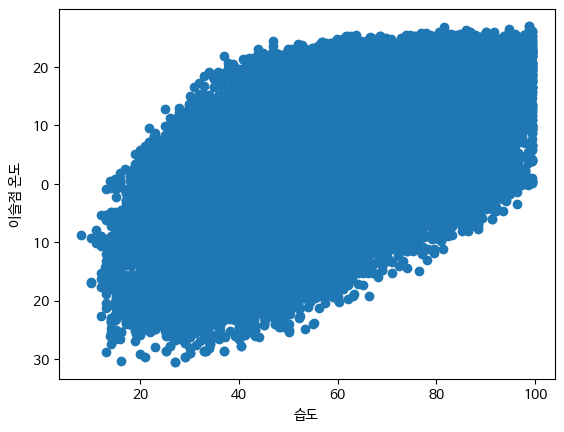

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


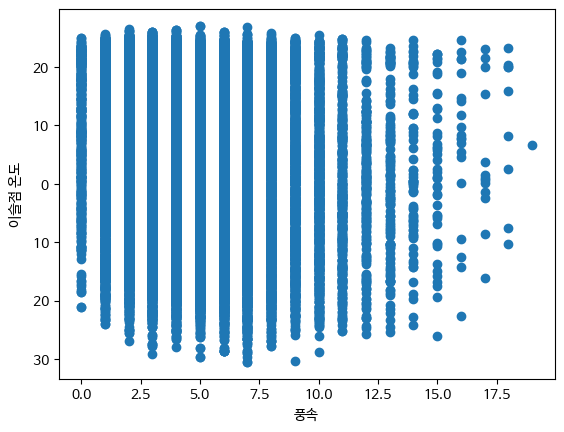

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


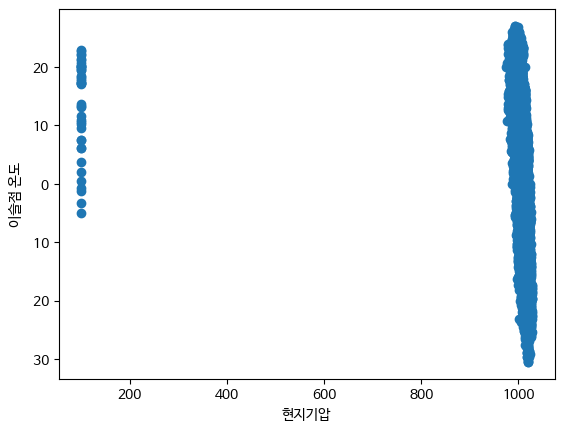

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


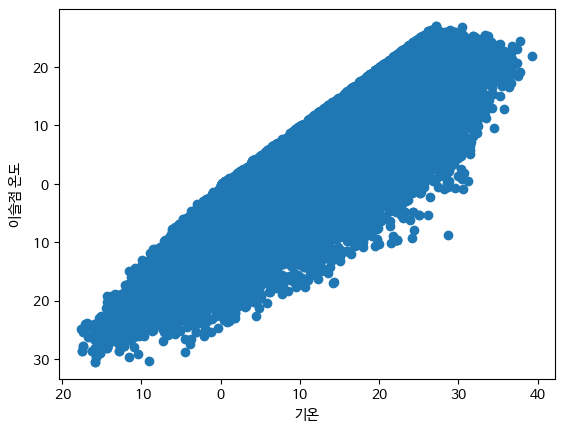

In [5]:
## Quiz 3-2

# 한화면에 출력하여 제출 -> 출력 전체보기 -> 화면 비율 낮춰서 한번에
xlist = ["습도", "풍속", "현지기압", "기온"]
y = "이슬점 온도"
for x in xlist:
  plt.scatter(df2[[x]], df2[[y]])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

Quiz 3-3

In [6]:
# QUiz 3-3
df3 = df2.loc[(df2["현지기압"] >= 200), ["습도","풍속","현지기압","기온","이슬점 온도"]]
print(len(df3['현지기압']))
print(df3)

32027
         습도    풍속   현지기압    기온  이슬점 온도
0      70.7   3.0  995.0  25.0    19.3
1      61.8   3.0  993.9  27.9    19.9
2      49.7   3.0  992.3  30.5    18.8
3      66.8   6.0  992.1  28.8    22.0
4      79.6   4.0  993.4  26.3    22.5
...     ...   ...    ...   ...     ...
32080  65.7  11.0  987.0  21.7    15.0
32081  83.8   5.0  989.7  18.9    16.1
32082  84.9   7.0  991.2  18.8    16.2
32083  85.9   4.0  991.7  18.4    16.0
32084  88.7   6.0  992.7  18.3    16.4

[32027 rows x 5 columns]


Quiz 3-4

In [7]:
# Quiz 3-4
data3_pearson = df3.corr(method="pearson")

data3_dpt = data3_pearson[["이슬점 온도"]]
print(data3_dpt.sum()-1)

이슬점 온도    0.618725
dtype: float64


Quiz 3-5

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


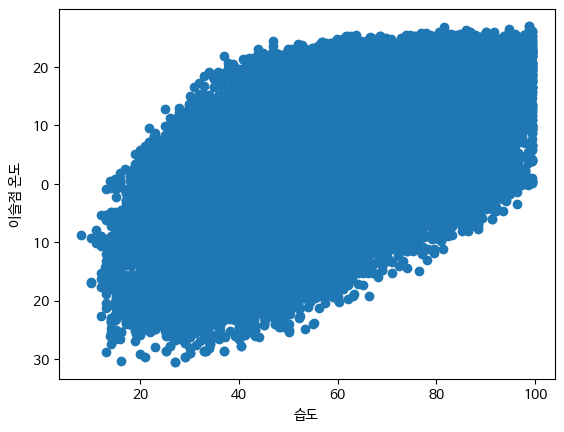

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


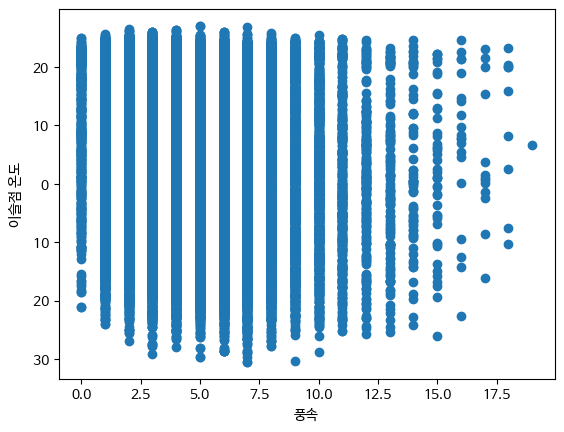

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


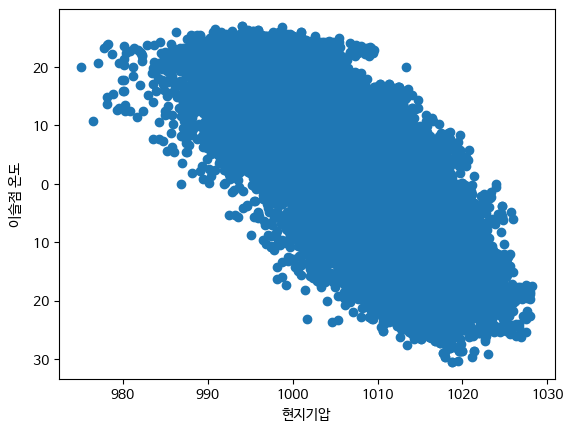

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


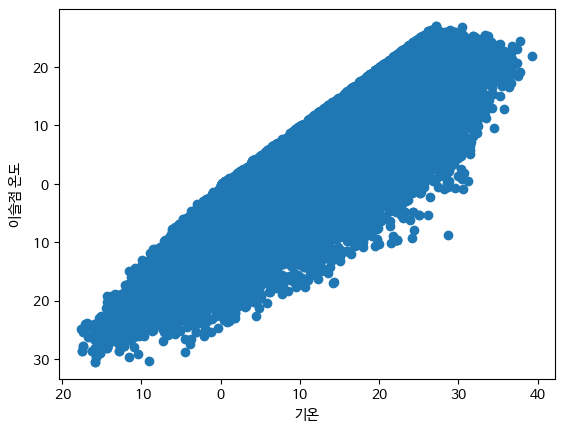

In [8]:
# Quiz 3-5
xlist = ["습도", "풍속", "현지기압", "기온"]
y = "이슬점 온도"
for x in xlist:
  plt.scatter(df3[[x]], df3[[y]])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()


### Quiz 4

Quiz 4-1

In [9]:
print(df3)

         습도    풍속   현지기압    기온  이슬점 온도
0      70.7   3.0  995.0  25.0    19.3
1      61.8   3.0  993.9  27.9    19.9
2      49.7   3.0  992.3  30.5    18.8
3      66.8   6.0  992.1  28.8    22.0
4      79.6   4.0  993.4  26.3    22.5
...     ...   ...    ...   ...     ...
32080  65.7  11.0  987.0  21.7    15.0
32081  83.8   5.0  989.7  18.9    16.1
32082  84.9   7.0  991.2  18.8    16.2
32083  85.9   4.0  991.7  18.4    16.0
32084  88.7   6.0  992.7  18.3    16.4

[32027 rows x 5 columns]


In [10]:
from sklearn.linear_model import LinearRegression

x = df3[["습도", "풍속", "현지기압", "기온"]]
y = df3[["이슬점 온도"]]

lr = LinearRegression()
lr.fit(x,y)

print(lr.coef_, lr.intercept_)

[[ 0.2676329  -0.03078923  0.00952646  0.92936961]] [-32.91662937]


Quiz 4-2

In [11]:
import numpy as np
x = np.array(x) # 데이터 타입을 : 데이터프레임 -> numpy
h = np.dot(x, lr.coef_.T) +  lr.intercept_ # w*x(내적) + b
cost = ((h-y)**2).mean()
print(cost)

이슬점 온도    1.168515
dtype: float64


### Quiz 5

In [12]:
import pickle
import matplotlib.pyplot as plt

In [13]:
data = pickle.load(open("mid_animal_data_pub.pkl", "rb"))
# print(data['train_images'])

# plt.imshow(data['train_images'][2])
# plt.show()

Quiz 5-1

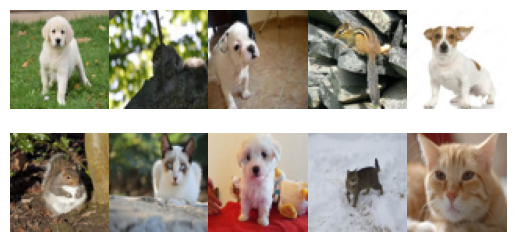

In [14]:
# 문제 10
f, ax = plt.subplots(2,5)
plt.subplots_adjust(wspace=0, hspace=-0.5)
for i in range(2):
  for j in range(5):
    ax[i,j].imshow(data['test1_images'][j+i*5])
    ax[i,j].axis('off') # 눈금 없애기 - subplot 항목마다 적용시키기
plt.show()


Quiz 5-2

In [15]:
# 문제 11
import numpy as np
from numpy.linalg import norm

x = data['train_vectors'][0]
y = data['test1_vectors'][1]

cos = np.dot(x, y)/(norm(x)*norm(y))
# norm -> 벡터의 정규화
# 코사인 유사도 = np.dot(x,y) / (norm(x)*norm(y))
print(cos)


-0.23914206


Quiz 5-3

In [16]:
# 문제 12

sum = 0

for i in range(len(data['test1_vectors'])):
  l = []
  x = data['test1_vectors'][i]
  for j in range(len(data['train_vectors'])):
    y = data['train_vectors'][j]
    l.append(np.dot(x,y) / (norm(x)*norm(y))) # 리스트에 값을 추가하려면 list.append() 를 사용하자!

  sl = list(l) # l.copy(), [] + l -> l리스트를 sl 리스트에 복사 -> 서로 다른 메모리 주소를 가지기 때문에 원본값이 바뀌지 않는다!!
  sl.sort(reverse=True)

  for k in range(3):
    index = l.index(sl[k])
    sum += index


print(sum)




14090


Quiz 5-4

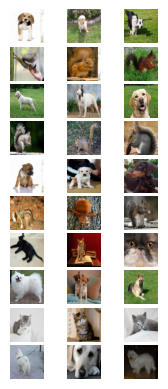

In [17]:
# 문제 13

f, ax = plt.subplots(10, 3) # subplots으로 한화면에 그림을 이쁘게 나타낼 수 있다.
plt.subplots_adjust(wspace=-0.85, hspace=0.1) # subplots 에서 plt.subplots_adjust(wspace= , hspace= )로 각 그림출력의 간격을 조절할 수 있다
# 간격 줄이기 -> -x 입력 가능!!

for i in range(len(data['test1_vectors'])):
  l = []
  x = data['test1_vectors'][i]
  for j in range(len(data['train_vectors'])):
    y = data['train_vectors'][j]
    l.append(np.dot(x,y) / (norm(x)*norm(y))) # 리스트에 값을 추가하려면 list.append() 를 사용하자!

  sl = list(l) # l.copy(), [] + l -> l리스트를 sl 리스트에 복사 -> 서로 다른 메모리 주소를 가지기 때문에 원본값이 바뀌지 않는다!! -> .sort()시 새로 할당한 sl리스트만 정렬된다!
  sl.sort(reverse=True)

  for k in range(3):
    index = l.index(sl[k])
    ax[i,k].imshow(data['train_images'][index])
    ax[i,k].axis('off')

plt.show()




Quiz 5-5 (빈칸 채우기)

SoftmaxRegression 구현하기

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256, 3)
# param1 = x_train의 차원 : 256 (.shape했을때 두번째 값!!)
# param2 = 구분할 클래스 개수

optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z,y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"epoch:{epoch}, cost:{cost.item()}")

epoch:0, cost:2.708970785140991
epoch:100, cost:0.00043842443847097456
epoch:200, cost:0.0002004574052989483
epoch:300, cost:0.00013200774264987558
epoch:400, cost:0.00010236447269562632
epoch:500, cost:8.650765812490135e-05
epoch:600, cost:7.66255398048088e-05
epoch:700, cost:6.979065801715478e-05
epoch:800, cost:6.471417873399332e-05
epoch:900, cost:6.073851909604855e-05
epoch:1000, cost:5.748902913182974e-05
epoch:1100, cost:5.473582859849557e-05
epoch:1200, cost:5.23344860994257e-05
epoch:1300, cost:5.0189377361675724e-05
epoch:1400, cost:4.823557173949666e-05
epoch:1500, cost:4.6431443479377776e-05
epoch:1600, cost:4.474514935282059e-05
epoch:1700, cost:4.315563273848966e-05
epoch:1800, cost:4.164934580330737e-05
epoch:1900, cost:4.021373388241045e-05
epoch:2000, cost:3.884232501150109e-05
epoch:2100, cost:3.752846532734111e-05
epoch:2200, cost:3.626730540418066e-05
epoch:2300, cost:3.5056727938354015e-05
epoch:2400, cost:3.3892840292537585e-05
epoch:2500, cost:3.277316864114255e-

Quiz 5-6

from sklearn.linear_model import LinearRegression (리니어 리그레션)
from sklearn.linear_model import LogisticRegression (로지스틱, 소프트맥스)

sklearn 리스레션 방법과 코드는 무조건 암기!! 값을 구할때는 웬만하면 sklearn 으로!!

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

pred = model.predict(data['test2_vectors'])
print(pred)


[2 1 2 2 2 0 0 0 1 1 2 2 1 1 2 1 0 0 2 0 2 1 2 0 1 1 1 1 2 2]
